In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Load data into memory
data = pd.read_csv("./data.csv")

print(data.head())

# We can skip data cleaning because dataset is already processed

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# Concert into a matrix
data = np.array(data)
print(data.shape)

(42000, 785)



Dataset has 42k images of 28x28 dimension
Flattening is when you take a matrix and convert it into a vector by concatenating the rows
There is an additional coulumn (the first one) which is the label of the row. It represent the number hand written in the matrix flattered in the row.

We now have to split data into a matrix X and a vector Y wherer:
- X is dimension (420000, 784)
- Y is dimension (42000, )
- Y os the first coulumn of data, while X is the rest

In [4]:
X = data[:, 1:].T
print(X.shape)

Y = data[:, 0]
print(Y.shape)

d, N = X.shape
print(d, N)

(784, 42000)
(42000,)
784 42000


How to visualize image in Python?

8


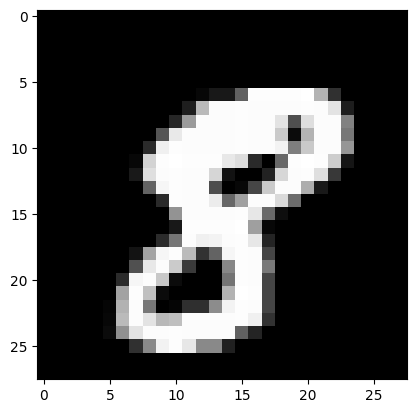

In [5]:
# Define an index and extracts a full row from X matrix
idx = 10
img = X[:, idx]
img = np.reshape(img, (28,28))
print(Y[idx])

plt.imshow(img, cmap="gray")
plt.show()

allN = 8 
idxs = [i for i in range(1, 42000, 1) if (Y[i]==allN)]
# print(idxs)

Create a function implementing the split. It takes as input the dataset X and an integer Ntrain and returns 4 arrays 
- Xtrain: composed by Ntrain random samples from X
- Xtest: is the rest of the array X
- Ytrain and Ytest accordingly

Limitation: the sample has to be random (numpy.random.shuffle)
Example: if Ntrain = 30000 on our MNIST data, the shapes should be:
- Xtrain  (784, 30000)
- Xtest (784, 12000)
- Ytrain (30000, )
- Ytest (12000, )

In [6]:
def split(X, Y, Ntrain):
    _, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest
    

Xtrain, Xtest, Ytrain, Ytest = split(X,Y,30000)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(784, 30000) (784, 12000) (30000,) (12000,)


<h3>Implementation of PCA</h3>
To implement PCA, we first need to center the data. This can be done by defining its centroid.

In [7]:
def get_centroid(X):
    d, N = X.shape
    return np.mean(X, axis=1)

centroid = get_centroid(Xtrain)
centroid = np.reshape(centroid, (len(centroid),1))
X_c = Xtrain - centroid

Computing SVD

In [8]:
U, s, VT = np.linalg.svd(X_c, full_matrices=False)

In [9]:
def PCA(X, k):
    U, _, _ = np.linalg.svd(X, full_matrices=False)
    U = np.resize(U, (len(U), k))
    return U.T@X

k = 2
Z_k = PCA(X_c, k)
print(Z_k.shape)

(2, 30000)


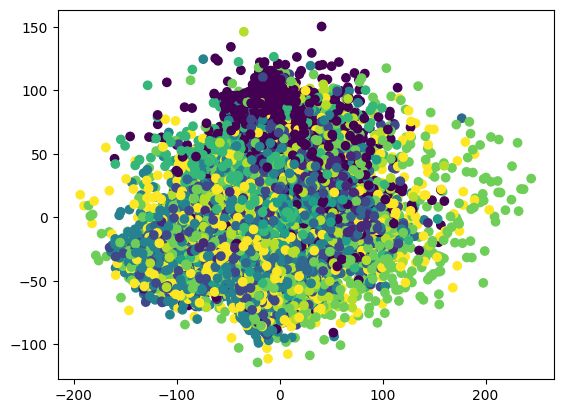

In [10]:
# use plt.scatter with c=Ytrain
plt.scatter(Z_k[0,:], Z_k[1,:], c=Ytrain)

(3, 30000)


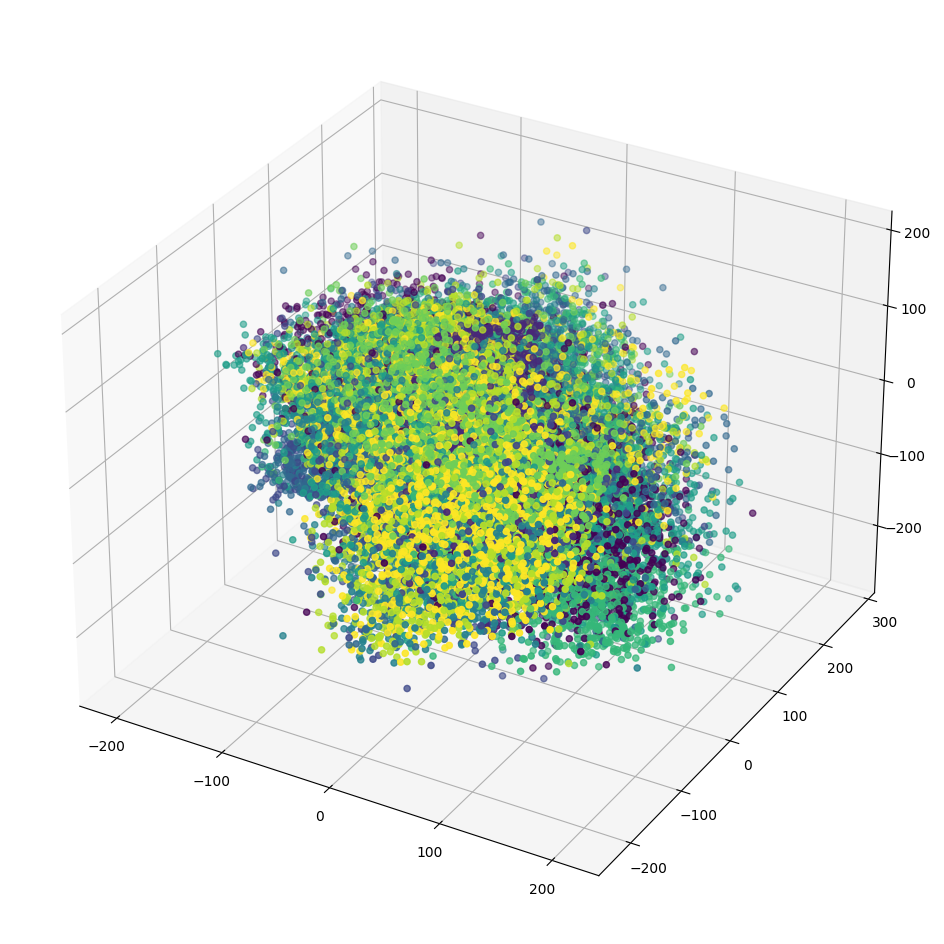

In [11]:
k3d = 3
Z_k3D = PCA(X_c, k3d)
print(Z_k3D.shape)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_k3D[0,:], Z_k3D[1,:], Z_k3D[2,:], c=Ytrain)
